## Обучение без учителя

### Задание 01

##### Импортируйте библиотеки pandas, numpy и matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

##### Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и Y из этих данных.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names

In [3]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

##### Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Масштабируйте данные с помощью StandardScaler.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
X_train_scaled.shape

(404, 13)

##### Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne.shape

(404, 2)

##### Постройте диаграмму рассеяния на этих данных.

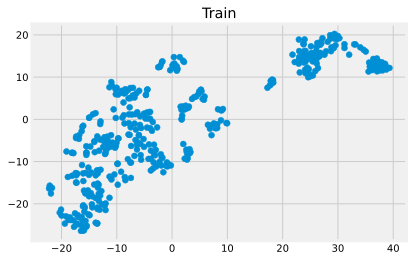

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title('Train')
plt.show()

### Задание 02

##### С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

##### Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

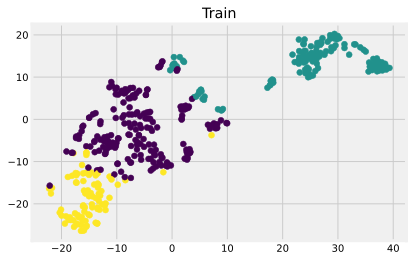

In [9]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.title('Train')
plt.show()

##### Вычислите средние значения price и CRIM в разных кластерах.

In [10]:
print(f"Средние значения price в разных кластерах:")
print(f"{y_train.loc[labels_train==0, 'price'].mean()}")
print(f"{y_train.loc[labels_train==1, 'price'].mean()}")
print(f"{y_train.loc[labels_train==2, 'price'].mean()}")
print(f"Средние значения CRIM в разных кластерах:")
print(f"{X_train.loc[labels_train==0, 'CRIM'].mean()}")
print(f"{X_train.loc[labels_train==1, 'CRIM'].mean()}")
print(f"{X_train.loc[labels_train==2, 'CRIM'].mean()}")

Средние значения price в разных кластерах:
24.958115183246072
16.165354330708666
27.788372093023252
Средние значения CRIM в разных кластерах:
0.42166020942408367
10.797028425196853
0.07356558139534886


### Задание 03

##### Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

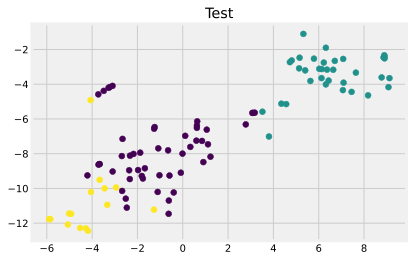

In [11]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
labels_test = kmeans.predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.title('Test')
plt.show()

##### Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [12]:
print(f"Средние значения price в разных кластерах:")
print(f"{y_test.loc[labels_test==0, 'price'].mean()}")
print(f"{y_test.loc[labels_test==1, 'price'].mean()}")
print(f"{y_test.loc[labels_test==2, 'price'].mean()}")
print(f"Средние значения CRIM в разных кластерах:")
print(f"{X_test.loc[labels_test==0, 'CRIM'].mean()}")
print(f"{X_test.loc[labels_test==1, 'CRIM'].mean()}")
print(f"{X_test.loc[labels_test==2, 'CRIM'].mean()}")

Средние значения price в разных кластерах:
21.860784313725492
16.437142857142856
31.35
Средние значения CRIM в разных кластерах:
0.26607882352941176
10.165531142857143
0.062060000000000004
